<a href="https://colab.research.google.com/github/Tiasha-26/Time-Series-Fourier-Analysis/blob/main/Time%20Series%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import adfuller


In [ ]:
                         #data 1
f=pd.read_csv(r"/content/covid - covid (1).csv")
xdata=f.DATE
ydata=f.Daily_Confirmed

x=np.arange(1,116)

plt.title("actual data")
plt.xlabel("days")
plt.ylabel("No.of cases confirmed")
plt.plot(x,ydata,label="original")
#plt.show()

rmean=ydata.rolling(window=10).mean()
rstd=ydata.rolling(window=10).std()
plt.title("Rolling Mean and Standard deviation Test")
plt.xlabel("days")
plt.ylabel("values")
plt.plot(x,rmean,label="rolling mean",color="r")
plt.plot(x,rstd,label="standard deviation",color="violet")
plt.legend()
plt.show()
#plt.savefig("1.pdf")
y=np.diff(ydata)
y1=pd.Series(y)
rmean1=y1.rolling(window=20).mean()
rstd1=y1.rolling(window=20).std()

x=np.delete(x,0)
  #using difference method for conversion of non stationary time series
plt.plot(x,y1,label="after differencing")
plt.plot(x,rmean1,label="rolling mean",color="r")
plt.plot(x,rstd1,label="rolling std",color="violet")
plt.title("using difference method")
plt.legend()
plt.show()
#plt.savefig("2.pdf")
dftest = adfuller(y1)
print("p value is :",dftest[1])
print("Test Statistic  value:",dftest[0])
d=dftest[4]
#print(type(d))
print("Critical Value (1%) :",d.get('1%'))
print("Critical Value (5%) :",d.get('5%'))
print("Critical Value (10%) :",d.get('10%'))

#y=np.log(ydata)
#y1=np.diff(y)
#plt.plot(x,y1)#first converting into log series then applying  difference method
#plt.title("log+difference method")
#plt.label("data")
#y1=pd.Series(y1)
#rmean2=y1.rolling(window=2).mean()
#rstd2=y1.rolling(window=2).std()
#plt.plot(x,rmean2,label="rolling mean",color="red")
#plt.plot(x,rstd2,label="rolling std",color="green")
#plt.legend()
#plt.show()
#y1=y1.dropna()
#dftest = adfuller(y1)
#print("p value is :",dftest[1])

y=np.cbrt(ydata)
y1=np.diff(y)
y1=pd.Series(y1)
plt.plot(x,y1,label="modified values")
plt.title("cube rooting+difference method")
rmean3=y1.rolling(window=2).mean()
rstd3=y1.rolling(window=2).std()
plt.plot(x,rmean3,label="rolling mean",color="red")
plt.plot(x,rstd3,label="rolling std",color="yellow")
plt.legend()
plt.show()
#plt.savefig("3.pdf")

dftest = adfuller(y1)
print("p value is :",dftest[1])
print("Test Statistic  value:",dftest[0])
d=dftest[4]
#print(type(d))
print("Critical Value (1%) :",d.get('1%'))
print("Critical Value (5%) :",d.get('5%'))
print("Critical Value (10%) :",d.get('10%'))



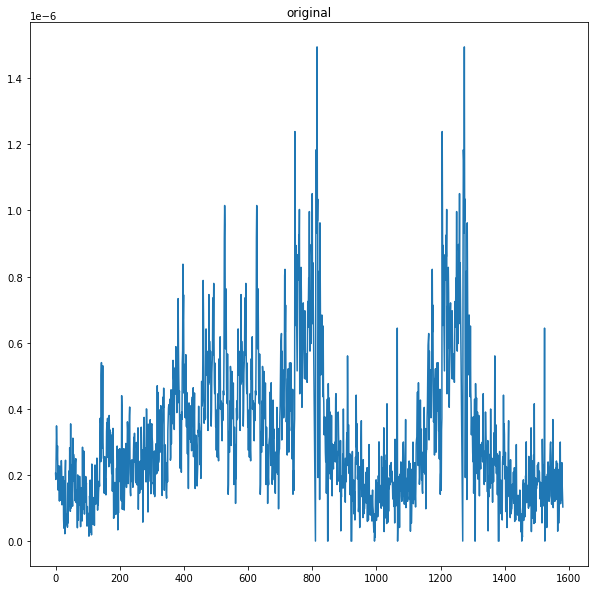

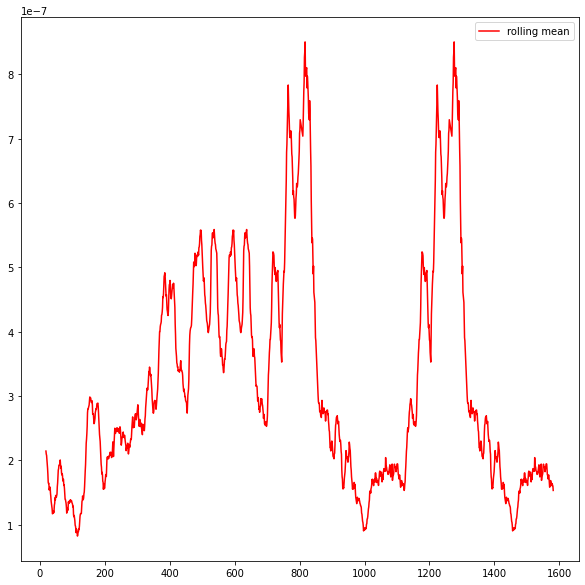

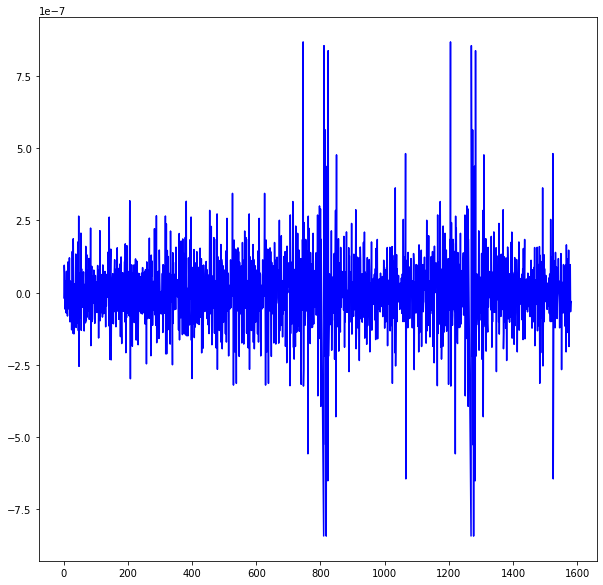

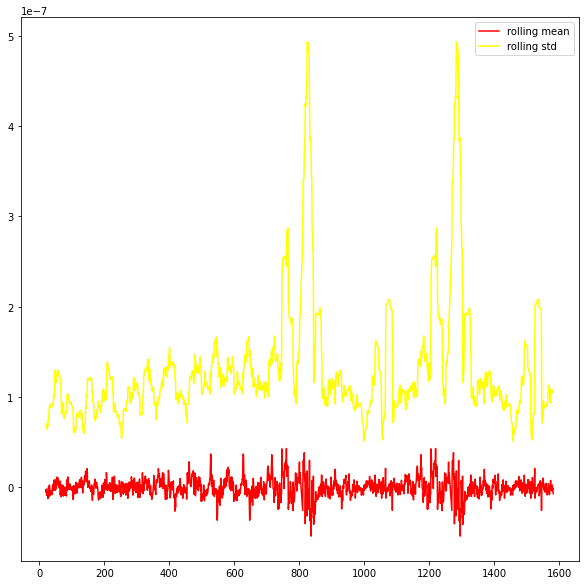

p value: 5.881295482197483e-28
Test Statistic  value: -15.198123948544005
Critical Value (1%) : -3.4345923608042512
Critical Value (5%) : -2.8634137428910185
Critical Value (10%) : -2.567767551360439


In [ ]:

f=np.loadtxt("/content/NGC_1275_MJD_54675_59823 (1).txt")
MJDs=f[:,0]
MJDe=f[:,1]
flux=f[:,4]

Mjd_s=pd.Series(MJDs)
Mjd_e=pd.Series(MJDe)
mean=np.array((MJDs+MJDe)/2)

flux1=pd.Series(flux)
flux1.dropna(inplace=True)

#plt.rcParams["figure.figsize"]=(10,10)
mean=plt.plot(flux1)   #in this plot we are getting straight line due to NAN points (in data)  check signal(source) and background noise  .
plt.title("original")                        #we need 2 avoid those points by either considering 0 or interpolate at those points
plt.show()
#plt.savefig("1m.pdf")
rmean=flux1.rolling(window=20).mean()
rstd=flux1.rolling(window=20).std()
mean=plt.plot(rmean,label="rolling mean",color="red")
#mean=plt.plot(rstd,label="rolling std",color="yellow")
plt.legend()
plt.show()
#plt.savefig("11m.pdf")


fdiff=flux1-flux1.shift(1)
mean=plt.plot(fdiff,label="differencing",color="blue")
plt.show()
#plt.savefig("2m.pdf")
rmean=fdiff.rolling(window=20).mean()
rstd=fdiff.rolling(window=20).std()
mean=plt.plot(rmean,label="rolling mean",color="red")
mean=plt.plot(rstd,label="rolling std",color="yellow")
plt.legend()
plt.show()
#plt.savefig("22m.pdf")
#print(fdiff)
fdiff=fdiff.drop(0)
dftest=adfuller(fdiff)
#print(dftest)
print("p value:",dftest[1])
print("Test Statistic  value:",dftest[0])
d=dftest[4]
#print(type(d))
print("Critical Value (1%) :",d.get('1%'))
print("Critical Value (5%) :",d.get('5%'))
print("Critical Value (10%) :",d.get('10%'))